# SA-2022 WEEK 3 GRADED ASSIGNMENT

> Spaceship Titanic

Predict which passengers are transported to an alternate dimension

![](https://www.gannett-cdn.com/-mm-/682bf77435754aee88576469063388a7d8b07c2a/c=0-150-1280-873/local/-/media/2017/02/01/Reno/RGJ/636215634914521096-image001.jpg?width=660&height=373&fit=crop&format=pjpg&auto=webp)


### <b>Description</b>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

### <b>Data description</b>

- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- <code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- <code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.
- <code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- <code>Cabin</code> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- <code>Destination</code> - The planet the passenger will be debarking to.
- <code>Age</code> - The age of the passenger.
- <code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.
- <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- <code>Name</code> - The first and last names of the passenger.
- <code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### <b>Algorithm Documentation</b> (Highly recommended!)
- <code>Logistic Regression</code> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- <code>SVM</code> : https://scikit-learn.org/stable/modules/svm.html
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- <code>Label Encoder</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- <code>Label Binarizer</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
- <code>Standard Scaler</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- <code>Cross Val Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Install Required Libraries</h1></span>

In [223]:
## ======== YOUR CODE HERE ======== ##

## Import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib
import seaborn


## Import Logistic regression and SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



## Import Confusion matrix, plot confusion matrix, classification report, accuracy score, auc-roc score and roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## Import Label encoder, label binarizer and Standard Scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

## ================================ ##

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Read the data

In [224]:
## ======== YOUR CODE HERE ======== ##

# Use df as the dataframe name throughout the notebook.

df = pd.read_csv('/content/data.csv')
df.head()

## ================================ ##

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,Andromeda,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,Andromeda,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,Andromeda,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,Andromeda,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,Andromeda,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Check the shape of data. It should be  (8693, 14)

In [225]:
## ======== YOUR CODE HERE ======== ##

df.shape

## ================================ ##

(8693, 14)

#### Apply describe on dataframe

In [226]:
## ======== YOUR CODE HERE ======== ##

df.describe()
## ================================ ##

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Check if there any null value in the dataset.

In [227]:
## ======== YOUR CODE HERE ======== ##

df.isnull().sum()


## ================================ ##

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### Number continuous and categorical features

In [228]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,Andromeda,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,Andromeda,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,Andromeda,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,Andromeda,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,Andromeda,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,Virgo,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,Cygnus,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,Andromeda,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,Virgo,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [229]:
set(df.columns.values)-set(categorical_features)

{'Age',
 'FoodCourt',
 'PassengerId',
 'RoomService',
 'ShoppingMall',
 'Spa',
 'VRDeck'}

In [230]:
df['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., 25., 38., 36.,
       22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64., 67.,
       61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5., 79.,
       68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66., 69.,
       72., 77.])

In [231]:
#################################################################
# Don't make mistake here. Ask in the discussion section if you are stuck. Help will be provided
#################################################################
## ======== YOUR CODE HERE ======== ##
continous_features = ['Age', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck'] # Fill the continuous fearures inside the array
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name','Transported'] # Fill the categorical features inside the array
## ======== YOUR CODE HERE ======== ##
print("Continous Features: ", continous_features)
print("No. of Continuous features: ", len(continous_features))
print("Categorical Features: ", categorical_features)
print("No. of Categorical Features: ", len(categorical_features))

Continous Features:  ['Age', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck']
No. of Continuous features:  6
Categorical Features:  ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']
No. of Categorical Features:  7


#### Unique values

In [232]:
# Print the number of unique values of the categorical features

## ======== YOUR CODE HERE ======== ##

for cat_name in categorical_features:
  print(cat_name)
  print( df[cat_name].unique() )
  print('\n')
  
## ======== YOUR CODE HERE ======== ##

HomePlanet
['Europa' 'Earth' 'Mars']


CryoSleep
[False  True]


Cabin
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']


Destination
['Andromeda' 'Cygnus' 'Virgo']


VIP
[False  True]


Name
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


Transported
[False  True]




<code>Note: If we apply one-hot-encoding to a categorical feature with many unique values, </code>
- Number of columns will be high
- Time required for training a model will be high
- We may not get usefull insights about the data

<code>This is the reason we are droping the features with more unique values.</code>


#### Drop the features

In [233]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,Andromeda,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,Andromeda,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,Andromeda,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,Andromeda,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,Andromeda,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,Virgo,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,Cygnus,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,Andromeda,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,Virgo,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [234]:
# Drop those categorical features which have more than 25 unique values

## ======== YOUR CODE HERE ======== ##

df.drop( columns=['Name','Cabin','PassengerId'],inplace=True)

## ======== YOUR CODE HERE ======== ##

# Print the shape after droping the features
# Check: Shape --> (8693, 11)

## ======== YOUR CODE HERE ======== ##

df.shape

## ======== YOUR CODE HERE ======== ##

(8693, 11)

#### One Hot Encoding

In [235]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,Andromeda,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,Andromeda,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,Andromeda,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,Andromeda,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,Andromeda,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [236]:
# Hint: search for get_dummies

## ======== YOUR CODE HERE ======== ##

df = pd.get_dummies( df, columns=['Destination','HomePlanet'] )

df.shape
## ======== YOUR CODE HERE ======== ##

# Check: Shape --> (8693, 15)

(8693, 15)

#### Changing bool columns to 0,1

In [237]:
## ======== Run this code(Don't change any code)======== ##

df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

df.head()

## ======== Run this code(Don't change any code)======== ##


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_Andromeda,Destination_Cygnus,Destination_Virgo,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0


#### Split the data into train and test

In [238]:
## ======== YOUR CODE HERE ======== ##
 
## Test size should be 15% of the full dataset and use random state = 2022

X = df.drop( columns="Transported"  )
y = df[['Transported']]

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.15,random_state=42 )

## ================================ ##

In [239]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:", X_train.shape) # X_train
print("X_test:", X_test.shape) # X_test
print("y_train:", y_train.shape) # y_train
print("y_test:", y_test.shape) # y_test

## ================================ ##

X_train: (7389, 14)
X_test: (1304, 14)
y_train: (7389, 1)
y_test: (1304, 1)


#### Scale the data using Standard Scaler

In [240]:
## Use Standard Scaler to scale the train and test data

## ======== YOUR CODE HERE ======== ##

SS = StandardScaler()
SS.fit( X_train )
X_train = SS.transform(X_train)
X_test = SS.transform(X_test)

## ================================ ##

In [241]:
y_test

,Transported
304,1
2697,0
8424,0
1672,1
8458,1
...,...
7331,1
2582,0
3464,1
5774,0


## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [242]:
## Use Random state = 2021 and fit the LR model

## ======== YOUR CODE HERE ======== ##

LR = LogisticRegression()
LR.fit( X_train, y_train['Transported'].values )
y_pred = LR.predict( X_test )
y_pred_proba = LR.predict_proba( X_test )

## ================================ ##

In [243]:
y_pred_proba[:,1]

array([0.15850811, 0.53085133, 0.69069478, ..., 0.97522387, 0.00847264,
       0.69612818])

#### Plot confusion matrix

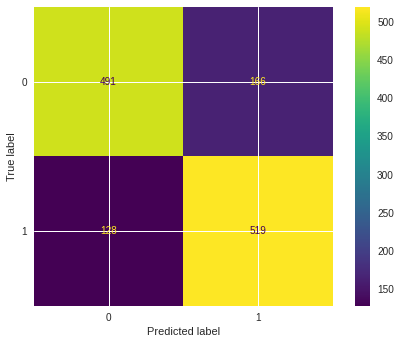

In [244]:
## ======== YOUR CODE HERE ======== ##

plot_confusion_matrix( LR , X_test, y_test )

## ================================ ##

#### Print classification report

In [245]:
## ======== YOUR CODE HERE ======== ##

classification_report( y_test, y_pred )

## ================================ ##

'              precision    recall  f1-score   support\n\n           0       0.79      0.75      0.77       657\n           1       0.76      0.80      0.78       647\n\n    accuracy                           0.77      1304\n   macro avg       0.78      0.77      0.77      1304\nweighted avg       0.78      0.77      0.77      1304\n'

#### Print accuracy score

In [246]:
## ======== YOUR CODE HERE ======== ##

accuracy_score( y_test, y_pred )

 
## ================================ ##

0.7745398773006135

#### Print ROC-AUC score

In [247]:
## ======== YOUR CODE HERE ======== ##

## Note: Use predict_proba!!! Read documentation/google it

roc_auc_score( y_test, y_pred_proba[:,1] )

## ================================ ##

0.8591508872468412

In [248]:
y_pred_proba

array([[0.84149189, 0.15850811],
       [0.46914867, 0.53085133],
       [0.30930522, 0.69069478],
       ...,
       [0.02477613, 0.97522387],
       [0.99152736, 0.00847264],
       [0.30387182, 0.69612818]])

#### Plot ROC-AUC Curve

Text(0, 0.5, 'True Positive Rate')

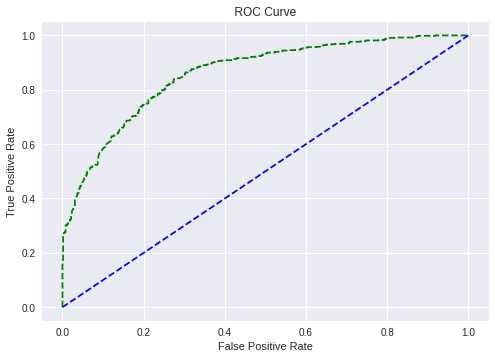

In [249]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph

fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1] )

matplotlib.pyplot.style.use('seaborn')
matplotlib.pyplot.plot(fpr, tpr, linestyle='--',color='green', label='Model_Name')
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
matplotlib.pyplot.plot(p_fpr, p_tpr, linestyle='--', color='blue')
matplotlib.pyplot.title( " ROC Curve " )
matplotlib.pyplot.xlabel('False Positive Rate')
matplotlib.pyplot.ylabel('True Positive Rate')
## ================================ ##

#### Cross validation

In [250]:
## ======== YOUR CODE HERE ======== ##

## cv=5 

cross_val_score( LR, X_train, y_train, cv=5 )


## ================================ ##

array([0.77875507, 0.78619756, 0.79499323, 0.78687415, 0.79485443])

## <b>SVM</b>
#### Use default parameters unless mentioned

In [251]:
## ======== YOUR CODE HERE ======== ##

## parameters: random_state = 2022, C=5, gamma='scale', kernel='rbf', probability=True

model_svm = SVC( random_state = 2022, C=5, gamma='scale', kernel='rbf', probability=True )
model_svm.fit( X_train, y_train)
y_pred = model_svm.predict( X_test )
y_pred_proba = model_svm.predict_proba( X_test )
## ================================ ##

#### Plot confusion matrix

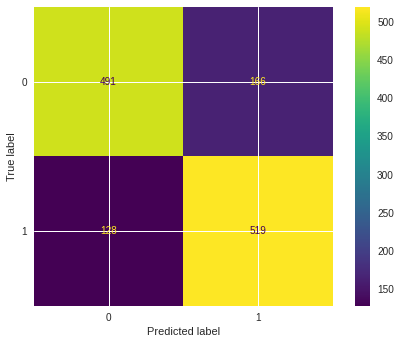

In [252]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.

plot_confusion_matrix( LR , X_test, y_test )


## ================================ ##

#### Print classification report

In [253]:
## ======== YOUR CODE HERE ======== ##

classification_report( y_test, y_pred )

## ================================ ##

'              precision    recall  f1-score   support\n\n           0       0.80      0.77      0.78       657\n           1       0.77      0.81      0.79       647\n\n    accuracy                           0.79      1304\n   macro avg       0.79      0.79      0.79      1304\nweighted avg       0.79      0.79      0.79      1304\n'

#### Print accuracy score

In [254]:
## ======== YOUR CODE HERE ======== ##

accuracy_score( y_test, y_pred )

 
## ================================ ##

0.7868098159509203

#### Print ROC-AUC score

In [255]:
## ======== YOUR CODE HERE ======== ##

## Note: Use predict_proba!!! Read documentation/google it

roc_auc_score( y_test, y_pred_proba[:,1] )


## ================================ ##

0.8462803384782592

#### Plot ROC-AUC curve

Text(0, 0.5, 'True Positive Rate')

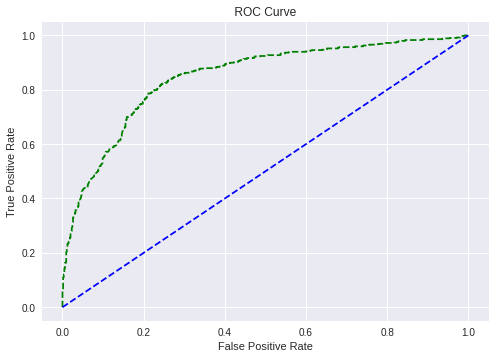

In [256]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph

fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1] )

matplotlib.pyplot.style.use('seaborn')
matplotlib.pyplot.plot(fpr, tpr, linestyle='--',color='green', label='Model_Name')
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
matplotlib.pyplot.plot(p_fpr, p_tpr, linestyle='--', color='blue')
matplotlib.pyplot.title( " ROC Curve " )
matplotlib.pyplot.xlabel('False Positive Rate')
matplotlib.pyplot.ylabel('True Positive Rate')

## ================================ ##

#### Cross validation

In [257]:
## ======== YOUR CODE HERE ======== ##

## cv=5 


cross_val_score( LR, X_train, y_train, cv=5 )


## ================================ ##

array([0.77875507, 0.78619756, 0.79499323, 0.78687415, 0.79485443])

# Congratulations! Assignment Completed! 